In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

### Reading Paywall Data

- Set **id feature** as the index of the dataframe because it is unique.
- Parse **date features** from string to numpy.datetime to facilitate future analysis.

In [2]:
pw = pd.read_csv('paywall_data.csv', index_col='id', parse_dates=list(range(2,18)))
pw.sort_index(inplace=True)
pw.shape

(55263, 17)

In [3]:
pw.head()

,Paid?,Registration Date,(Pw) Analytics,(Pw) Backup-restore,(Pw) Color-Management,(Pw) Custom-Fonts,(Pw) Downloadable-Publication,(Pw) Email-Thumb,(Pw) Embedding,(Pw) Page-Limit,(Pw) Pdf-dpi,(Pw) Premium Templates,(Pw) Pub-Password,(Pw) Publish-banner,(Pw) Revision-history,(Pw) Storage,(Pw) Unlicensed/View Only
id,,,,,,,,,,,,,,,,,
37854,0,2016-02-24 20:28:00,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
69884,0,2016-03-17 02:21:00,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
76916,0,2013-10-28 21:41:00,NaT,NaT,NaT,2015-01-16 02:37:00,NaT,NaT,NaT,NaT,2016-01-14 17:14:00,2016-03-22 17:26:00,NaT,2016-01-14 17:24:00,NaT,2016-04-02 09:29:00,NaT
87031,0,2016-03-09 08:38:00,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
129541,0,2016-03-29 07:59:00,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2016-02-01 14:12:00


### Reading Payment Data

- Set **id feature** as the index of the dataframe because it is unique.
- Parse **date feature** from string to numpy.datetime to facilitate future analysis.

In [4]:
pm = pd.read_csv('paywall_payment_data.csv', index_col='id', parse_dates=[1])
pm.sort_index(inplace=True)
pm.shape

(55263, 2)

In [5]:
pm.head(6)

,First Payment Date,First Payment Value
id,,
37854,NaT,NaN
69884,NaT,NaN
76916,NaT,NaN
87031,NaT,NaN
129541,NaT,NaN
136845,2016-03-17 09:42:00,19.95


### Concatenate Data

Concatenate the two tables.

In [6]:
raw_data = pd.concat([pw, pm], axis=1)
raw_data.shape

(55263, 19)

In [7]:
raw_data.head()

,Paid?,Registration Date,(Pw) Analytics,(Pw) Backup-restore,(Pw) Color-Management,(Pw) Custom-Fonts,(Pw) Downloadable-Publication,(Pw) Email-Thumb,(Pw) Embedding,(Pw) Page-Limit,(Pw) Pdf-dpi,(Pw) Premium Templates,(Pw) Pub-Password,(Pw) Publish-banner,(Pw) Revision-history,(Pw) Storage,(Pw) Unlicensed/View Only,First Payment Date,First Payment Value
id,,,,,,,,,,,,,,,,,,,
37854,0,2016-02-24 20:28:00,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaN
69884,0,2016-03-17 02:21:00,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaN
76916,0,2013-10-28 21:41:00,NaT,NaT,NaT,2015-01-16 02:37:00,NaT,NaT,NaT,NaT,2016-01-14 17:14:00,2016-03-22 17:26:00,NaT,2016-01-14 17:24:00,NaT,2016-04-02 09:29:00,NaT,NaT,NaN
87031,0,2016-03-09 08:38:00,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaN
129541,0,2016-03-29 07:59:00,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2016-02-01 14:12:00,NaT,NaN


- Since it is paywall analysis, we should remove the rows where there are no paywall click records at all. This reduce the size from 55263 rows to 14137 rows. 
- Remove the "Registration Date" which we are not interested in.

In [8]:
data = raw_data[(~raw_data.iloc[:,2:-2].isnull()).sum(axis=1) != 0]
data = data.drop('Registration Date', axis=1)
data.shape

(14137, 18)

In [9]:
data.head()

,Paid?,(Pw) Analytics,(Pw) Backup-restore,(Pw) Color-Management,(Pw) Custom-Fonts,(Pw) Downloadable-Publication,(Pw) Email-Thumb,(Pw) Embedding,(Pw) Page-Limit,(Pw) Pdf-dpi,(Pw) Premium Templates,(Pw) Pub-Password,(Pw) Publish-banner,(Pw) Revision-history,(Pw) Storage,(Pw) Unlicensed/View Only,First Payment Date,First Payment Value
id,,,,,,,,,,,,,,,,,,
76916,0,NaT,NaT,NaT,2015-01-16 02:37:00,NaT,NaT,NaT,NaT,2016-01-14 17:14:00,2016-03-22 17:26:00,NaT,2016-01-14 17:24:00,NaT,2016-04-02 09:29:00,NaT,NaT,NaN
129541,0,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2016-02-01 14:12:00,NaT,NaN
136845,1,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2016-03-17 05:52:00,2016-03-17 09:42:00,19.95
162124,0,NaT,NaT,2016-01-04 18:36:00,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2015-01-25 12:44:00,2015-01-30 02:34:00,NaT,NaN
245029,0,NaT,NaT,2016-03-20 17:18:00,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaN


### Conversion Rate

#### Counting clicks

- Remove irrelevant features
- Convert datetime values to boolean values

In [10]:
clicks = data.drop(['Paid?', 'First Payment Date', 'First Payment Value'], axis=1)
clicks = (~clicks.isnull()) * 1
clicks.head()

,(Pw) Analytics,(Pw) Backup-restore,(Pw) Color-Management,(Pw) Custom-Fonts,(Pw) Downloadable-Publication,(Pw) Email-Thumb,(Pw) Embedding,(Pw) Page-Limit,(Pw) Pdf-dpi,(Pw) Premium Templates,(Pw) Pub-Password,(Pw) Publish-banner,(Pw) Revision-history,(Pw) Storage,(Pw) Unlicensed/View Only
id,,,,,,,,,,,,,,,
76916,0,0,0,1,0,0,0,0,1,1,0,1,0,1,0
129541,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
136845,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
162124,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1
245029,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
click_counts = clicks.sum()
click_counts

(Pw) Analytics                    270
(Pw) Backup-restore                64
(Pw) Color-Management            2838
(Pw) Custom-Fonts                2025
(Pw) Downloadable-Publication    1501
(Pw) Email-Thumb                 1260
(Pw) Embedding                    195
(Pw) Page-Limit                  3519
(Pw) Pdf-dpi                     4268
(Pw) Premium Templates           3400
(Pw) Pub-Password                 297
(Pw) Publish-banner               725
(Pw) Revision-history             141
(Pw) Storage                     2786
(Pw) Unlicensed/View Only         132
dtype: int64

#### Clicks ending up with a payment

- Extract rows ending up with a payment
- Remove irrelevant features

In [12]:
good_clicks = data[data['Paid?']==1]
good_clicks = good_clicks.drop('Paid?', axis=1)
good_clicks.head()

,(Pw) Analytics,(Pw) Backup-restore,(Pw) Color-Management,(Pw) Custom-Fonts,(Pw) Downloadable-Publication,(Pw) Email-Thumb,(Pw) Embedding,(Pw) Page-Limit,(Pw) Pdf-dpi,(Pw) Premium Templates,(Pw) Pub-Password,(Pw) Publish-banner,(Pw) Revision-history,(Pw) Storage,(Pw) Unlicensed/View Only,First Payment Date,First Payment Value
id,,,,,,,,,,,,,,,,,
136845,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2016-03-17 05:52:00,2016-03-17 09:42:00,19.95
424856,NaT,2016-03-09 20:39:00,2016-01-04 12:18:00,NaT,NaT,NaT,NaT,NaT,2016-03-13 00:07:00,NaT,NaT,NaT,NaT,2016-03-09 20:37:00,NaT,2016-03-15 06:21:00,9.95
437065,NaT,NaT,2016-04-20 16:35:00,NaT,2016-02-18 13:40:00,NaT,NaT,2016-02-09 21:33:00,2016-02-02 21:25:00,2016-01-25 16:32:00,NaT,2016-02-02 18:16:00,NaT,NaT,NaT,2016-02-09 21:37:00,71.40
720703,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2016-03-14 06:28:00,2016-03-15 13:43:00,2016-03-15 13:28:00,160.00
1467763,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2016-04-24 07:26:00,2016-04-15 09:07:00,NaT,NaT,NaT,NaT,NaT,NaT,2016-04-24 07:29:00,71.40


In [13]:
value = good_clicks['First Payment Value']
value.head()

id
136845      19.95
424856       9.95
437065      71.40
720703     160.00
1467763     71.40
Name: First Payment Value, dtype: float64

Calculate the time difference between the first payment and the time of click.

In [14]:
delta = -good_clicks.iloc[:,:-1].sub(good_clicks['First Payment Date'], axis=0)
delta = delta.drop('First Payment Date', axis=1)
delta.head()

,(Pw) Analytics,(Pw) Backup-restore,(Pw) Color-Management,(Pw) Custom-Fonts,(Pw) Downloadable-Publication,(Pw) Email-Thumb,(Pw) Embedding,(Pw) Page-Limit,(Pw) Pdf-dpi,(Pw) Premium Templates,(Pw) Pub-Password,(Pw) Publish-banner,(Pw) Revision-history,(Pw) Storage,(Pw) Unlicensed/View Only
id,,,,,,,,,,,,,,,
136845,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,03:50:00
424856,NaT,5 days 09:42:00,70 days 18:03:00,NaT,NaT,NaT,NaT,NaT,2 days 06:14:00,NaT,NaT,NaT,NaT,5 days 09:44:00,NaT
437065,NaT,NaT,-71 days +05:02:00,NaT,-9 days +07:57:00,NaT,NaT,00:04:00,7 days 00:12:00,15 days 05:05:00,NaT,7 days 03:21:00,NaT,NaT,NaT
720703,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,1 days 07:00:00,-1 days +23:45:00
1467763,NaT,NaT,NaT,NaT,NaT,NaT,NaT,00:03:00,8 days 22:22:00,NaT,NaT,NaT,NaT,NaT,NaT


Convert the datetime format to integer format in terms of day. Use infinity to denote not click.

In [15]:
diff = delta.applymap(lambda x: x.total_seconds() / 3600 / 24)
diff[diff < 0] = 0
diff = diff.fillna(np.inf)
diff.head()

,(Pw) Analytics,(Pw) Backup-restore,(Pw) Color-Management,(Pw) Custom-Fonts,(Pw) Downloadable-Publication,(Pw) Email-Thumb,(Pw) Embedding,(Pw) Page-Limit,(Pw) Pdf-dpi,(Pw) Premium Templates,(Pw) Pub-Password,(Pw) Publish-banner,(Pw) Revision-history,(Pw) Storage,(Pw) Unlicensed/View Only
id,,,,,,,,,,,,,,,
136845,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,0.159722
424856,inf,5.404167,70.752083,inf,inf,inf,inf,inf,2.259722,inf,inf,inf,inf,5.405556,inf
437065,inf,inf,0.000000,inf,0.000000,inf,inf,0.002778,7.008333,15.211806,inf,7.139583,inf,inf,inf
720703,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,1.291667,0.000000
1467763,inf,inf,inf,inf,inf,inf,inf,0.002083,8.931944,inf,inf,inf,inf,inf,inf


Model the probability of a paywall causing a user to pay based on the **forgetting curve** raised by **Hermann Ebbinghaus**. 

The reason is that the amount of memory left of the paywall is the basic measure of the probability. Additionaly, the nearer between the paywall and payment, the more likely it is the paywall that leads to the payment. Thus, the probablity of a paywall causing a user to pay should be sharper than the forgetting curve.

In [16]:
def ebbinghaus(d, s):
    return np.exp(- d * 3600 / s)

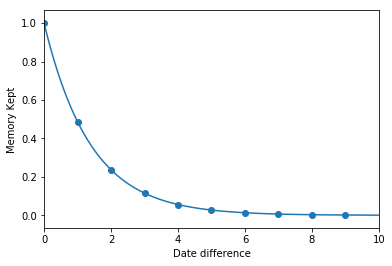

In [17]:
x1 = np.arange(0, 365, 0.1)
plt.plot(x1, ebbinghaus(x1, 5000))
x2 = np.arange(0, 10)
plt.scatter(x2, ebbinghaus(x2, 5000))

plt.xlabel('Date difference')
plt.ylabel('Memory Kept')
plt.xlim(0,10)
plt.show()

Calculate the score (i.e. effective clicks) for each paywall. The scores of paywalls for a single payment (i.e. a row) sum up to 1.0.

In [18]:
score = diff.applymap(lambda x: ebbinghaus(x, 3000))
score = score.apply(lambda x: x / x.sum(), axis=1)
score.head()

,(Pw) Analytics,(Pw) Backup-restore,(Pw) Color-Management,(Pw) Custom-Fonts,(Pw) Downloadable-Publication,(Pw) Email-Thumb,(Pw) Embedding,(Pw) Page-Limit,(Pw) Pdf-dpi,(Pw) Premium Templates,(Pw) Pub-Password,(Pw) Publish-banner,(Pw) Revision-history,(Pw) Storage,(Pw) Unlicensed/View Only
id,,,,,,,,,,,,,,,
136845,0.0,0.000000,0.000000e+00,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.0,0.000000,1.000000
424856,0.0,0.021967,1.929653e-36,0.0,0.000000,0.0,0.0,0.000000,0.956103,0.000000e+00,0.0,0.000000,0.0,0.021930,0.000000
437065,0.0,0.000000,3.336575e-01,0.0,0.333658,0.0,0.0,0.332547,0.000074,3.941097e-09,0.0,0.000063,0.0,0.000000,0.000000
720703,0.0,0.000000,0.000000e+00,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.0,0.175086,0.824914
1467763,0.0,0.000000,0.000000e+00,0.0,0.000000,0.0,0.0,0.999978,0.000022,0.000000e+00,0.0,0.000000,0.0,0.000000,0.000000


In [19]:
good_click_counts = score.sum()
good_click_counts

(Pw) Analytics                    34.963254
(Pw) Backup-restore                6.201968
(Pw) Color-Management            271.989042
(Pw) Custom-Fonts                207.101807
(Pw) Downloadable-Publication    126.115546
(Pw) Email-Thumb                  72.624484
(Pw) Embedding                    22.207088
(Pw) Page-Limit                  252.840056
(Pw) Pdf-dpi                     207.292026
(Pw) Premium Templates            39.824194
(Pw) Pub-Password                 13.795885
(Pw) Publish-banner               16.185928
(Pw) Revision-history              1.901832
(Pw) Storage                     225.783299
(Pw) Unlicensed/View Only          8.173590
dtype: float64

Calculate the conversion rate:

$conversion \ rate = \cfrac{effective \ clicks}{total \ clicks}$

In [20]:
conversion_rate = good_click_counts / click_counts
conversion_rate

(Pw) Analytics                   0.129494
(Pw) Backup-restore              0.096906
(Pw) Color-Management            0.095838
(Pw) Custom-Fonts                0.102272
(Pw) Downloadable-Publication    0.084021
(Pw) Email-Thumb                 0.057638
(Pw) Embedding                   0.113883
(Pw) Page-Limit                  0.071850
(Pw) Pdf-dpi                     0.048569
(Pw) Premium Templates           0.011713
(Pw) Pub-Password                0.046451
(Pw) Publish-banner              0.022325
(Pw) Revision-history            0.013488
(Pw) Storage                     0.081042
(Pw) Unlicensed/View Only        0.061921
dtype: float64

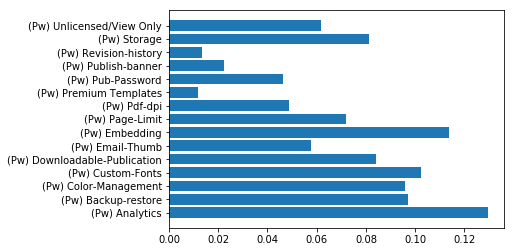

In [21]:
plt.barh(conversion_rate.index, conversion_rate.values)
plt.show()

### Revenue

Concatenate the scores and the values of payment.

In [22]:
socre_value = pd.concat([score, value], axis=1)
socre_value.head()

,(Pw) Analytics,(Pw) Backup-restore,(Pw) Color-Management,(Pw) Custom-Fonts,(Pw) Downloadable-Publication,(Pw) Email-Thumb,(Pw) Embedding,(Pw) Page-Limit,(Pw) Pdf-dpi,(Pw) Premium Templates,(Pw) Pub-Password,(Pw) Publish-banner,(Pw) Revision-history,(Pw) Storage,(Pw) Unlicensed/View Only,First Payment Value
id,,,,,,,,,,,,,,,,
136845,0.0,0.000000,0.000000e+00,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.0,0.000000,1.000000,19.95
424856,0.0,0.021967,1.929653e-36,0.0,0.000000,0.0,0.0,0.000000,0.956103,0.000000e+00,0.0,0.000000,0.0,0.021930,0.000000,9.95
437065,0.0,0.000000,3.336575e-01,0.0,0.333658,0.0,0.0,0.332547,0.000074,3.941097e-09,0.0,0.000063,0.0,0.000000,0.000000,71.40
720703,0.0,0.000000,0.000000e+00,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.0,0.175086,0.824914,160.00
1467763,0.0,0.000000,0.000000e+00,0.0,0.000000,0.0,0.0,0.999978,0.000022,0.000000e+00,0.0,0.000000,0.0,0.000000,0.000000,71.40


Distribute the values of payment to the paywall based on their scores.

In [26]:
distributed_revenue = socre_value.apply(lambda x: x * x[-1], axis=1)
distributed_revenue = distributed_revenue.drop('First Payment Value', axis=1)
distributed_revenue.head()

,(Pw) Analytics,(Pw) Backup-restore,(Pw) Color-Management,(Pw) Custom-Fonts,(Pw) Downloadable-Publication,(Pw) Email-Thumb,(Pw) Embedding,(Pw) Page-Limit,(Pw) Pdf-dpi,(Pw) Premium Templates,(Pw) Pub-Password,(Pw) Publish-banner,(Pw) Revision-history,(Pw) Storage,(Pw) Unlicensed/View Only
id,,,,,,,,,,,,,,,
136845,0.0,0.00000,0.000000e+00,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.0,0.000000,19.950000
424856,0.0,0.21857,1.920005e-35,0.0,0.000000,0.0,0.0,0.000000,9.513225,0.000000e+00,0.0,0.000000,0.0,0.218206,0.000000
437065,0.0,0.00000,2.382315e+01,0.0,23.823148,0.0,0.0,23.743870,0.005304,2.813943e-07,0.0,0.004531,0.0,0.000000,0.000000
720703,0.0,0.00000,0.000000e+00,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.0,28.013803,131.986197
1467763,0.0,0.00000,0.000000e+00,0.0,0.000000,0.0,0.0,71.398416,0.001584,0.000000e+00,0.0,0.000000,0.0,0.000000,0.000000


Sum up the distrubuted revenues for each paywall.

In [24]:
revenue = distributed_revenue.sum()
revenue

(Pw) Analytics                    1600.931837
(Pw) Backup-restore                148.537758
(Pw) Color-Management            10620.608512
(Pw) Custom-Fonts                 9431.051370
(Pw) Downloadable-Publication     6287.520747
(Pw) Email-Thumb                  3319.616337
(Pw) Embedding                    1443.179462
(Pw) Page-Limit                   9291.898269
(Pw) Pdf-dpi                      7677.017082
(Pw) Premium Templates            1996.192754
(Pw) Pub-Password                  534.699808
(Pw) Publish-banner                482.847103
(Pw) Revision-history               28.923228
(Pw) Storage                     11798.018904
(Pw) Unlicensed/View Only          459.716830
dtype: float64

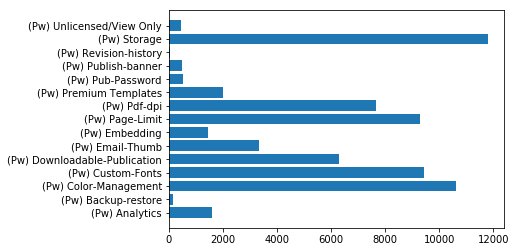

In [25]:
plt.barh(revenue.index, revenue.values)
plt.show()